# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


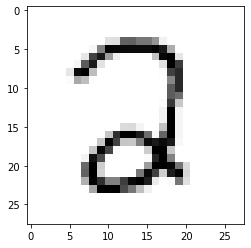

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2466
Training Accuracy: 0.6102, Testing Accuracy: 0.6396



Epoch 10, Loss 0.1307
Training Accuracy: 0.8931, Testing Accuracy: 0.9042



Epoch 20, Loss 0.068
Training Accuracy: 0.9326, Testing Accuracy: 0.9491



Epoch 30, Loss 0.0483
Training Accuracy: 0.9483, Testing Accuracy: 0.9602



Epoch 40, Loss 0.0399
Training Accuracy: 0.9579, Testing Accuracy: 0.9657



Epoch 50, Loss 0.0353
Training Accuracy: 0.9621, Testing Accuracy: 0.9672



Epoch 60, Loss 0.0324
Training Accuracy: 0.9645, Testing Accuracy: 0.9677



Epoch 70, Loss 0.0304
Training Accuracy: 0.9664, Testing Accuracy: 0.9682



Epoch 80, Loss 0.0288
Training Accuracy: 0.9677, Testing Accuracy: 0.9698



Epoch 90, Loss 0.0275
Training Accuracy: 0.9688, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0265
Training Accuracy: 0.9697, Testing Accuracy: 0.9698



Epoch 110, Loss 0.0255
Training Accuracy: 0.9705, Testing Accuracy: 0.9698



Epoch 120, Loss 0.0248
Training Accuracy: 0.9715, Testing Accuracy: 0.9718



Epoch 130, Loss 0.0241
Training Accuracy: 0.9720, Testing Accuracy: 0.9708



Epoch 140, Loss 0.0234
Training Accuracy: 0.9730, Testing Accuracy: 0.9713



Epoch 150, Loss 0.0228
Training Accuracy: 0.9735, Testing Accuracy: 0.9718



Epoch 160, Loss 0.0223
Training Accuracy: 0.9740, Testing Accuracy: 0.9723



Epoch 170, Loss 0.0218
Training Accuracy: 0.9748, Testing Accuracy: 0.9733



Epoch 180, Loss 0.0213
Training Accuracy: 0.9757, Testing Accuracy: 0.9738



Epoch 190, Loss 0.0209
Training Accuracy: 0.9760, Testing Accuracy: 0.9743



Epoch 200, Loss 0.0205
Training Accuracy: 0.9764, Testing Accuracy: 0.9743



Epoch 210, Loss 0.02
Training Accuracy: 0.9776, Testing Accuracy: 0.9733



Epoch 220, Loss 0.0197
Training Accuracy: 0.9781, Testing Accuracy: 0.9738



Epoch 230, Loss 0.0193
Training Accuracy: 0.9786, Testing Accuracy: 0.9738



Epoch 240, Loss 0.0189
Training Accuracy: 0.9794, Testing Accuracy: 0.9738



0.012658406027621007

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2417
Training Accuracy: 0.6988, Testing Accuracy: 0.7041



Epoch 10, Loss 0.1019
Training Accuracy: 0.9097, Testing Accuracy: 0.9224



Epoch 20, Loss 0.0795
Training Accuracy: 0.9249, Testing Accuracy: 0.9370



Epoch 30, Loss 0.069
Training Accuracy: 0.9332, Testing Accuracy: 0.9466



Epoch 40, Loss 0.0626
Training Accuracy: 0.9378, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0582
Training Accuracy: 0.9411, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0549
Training Accuracy: 0.9434, Testing Accuracy: 0.9582



Epoch 70, Loss 0.0523
Training Accuracy: 0.9462, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0502
Training Accuracy: 0.9481, Testing Accuracy: 0.9587



Epoch 90, Loss 0.0485
Training Accuracy: 0.9498, Testing Accuracy: 0.9597



Epoch 100, Loss 0.047
Training Accuracy: 0.9511, Testing Accuracy: 0.9607



Epoch 110, Loss 0.0458
Training Accuracy: 0.9517, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0447
Training Accuracy: 0.9533, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0437
Training Accuracy: 0.9539, Testing Accuracy: 0.9652



Epoch 140, Loss 0.0428
Training Accuracy: 0.9543, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0421
Training Accuracy: 0.9549, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0414
Training Accuracy: 0.9555, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0407
Training Accuracy: 0.9564, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0401
Training Accuracy: 0.9572, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0396
Training Accuracy: 0.9578, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0391
Training Accuracy: 0.9583, Testing Accuracy: 0.9657



Epoch 210, Loss 0.0386
Training Accuracy: 0.9587, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0382
Training Accuracy: 0.9589, Testing Accuracy: 0.9662



Epoch 230, Loss 0.0378
Training Accuracy: 0.9594, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0374
Training Accuracy: 0.9595, Testing Accuracy: 0.9672



0.04322836874164265

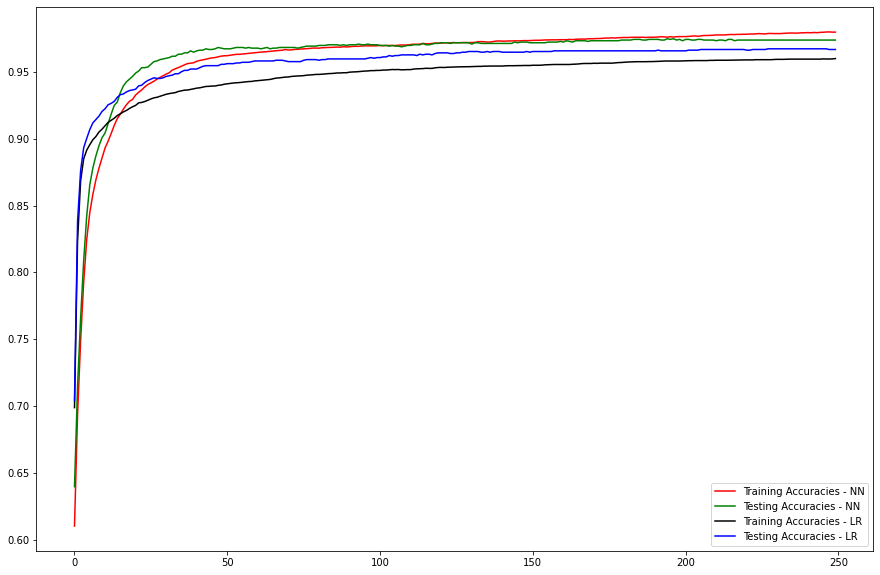

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

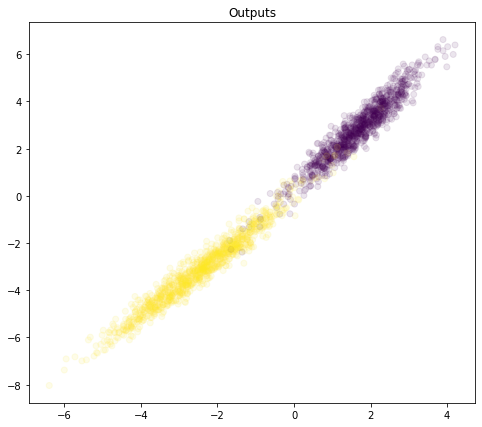

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

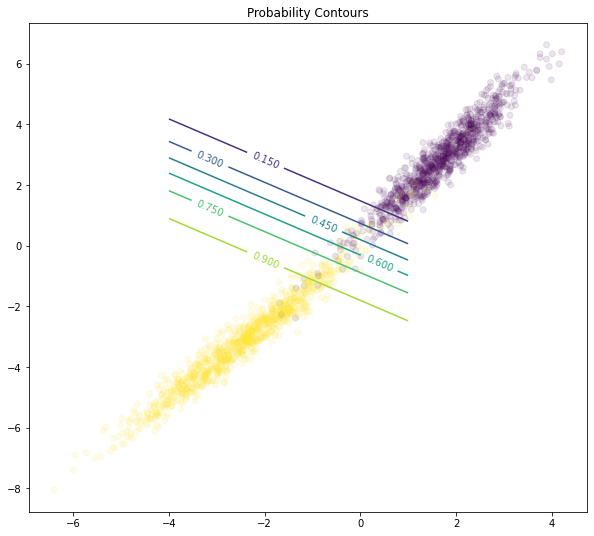

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );